We used DeepLabCut and DeepOF Python packages to obtain supervised behavior data

DeepLabCut: https://github.com/DeepLabCut/DeepLabCut

DeepOF: https://github.com/mlfpm/deepof

We followed the instruction of DeepOF to label 11 body parts (modified from deepof_14, without Tail_1, Tail_2, Tail_tip)in both subject and stranger mice in the videos of reciprocal social interactions, or label 11 body parts in subject mice in the videos prior to a reciprocal social interaction test.

DeepOF instructions: https://deepof.readthedocs.io/en/latest/index.html#

After training and analyzing the videos with Deeplabcut, the oupout DeepLabCut files associated with videos were analyzed by DeepOF.

Code was modified from from the DeepOF tutorial: https://deepof.readthedocs.io/en/latest/tutorial_notebooks/deepof_preprocessing_tutorial.html

modified parts  

#use 11 body parts  
deepof_custom = {
    "Nose": ["Left_ear", "Right_ear"],  
    "Spine_1": ["Center", "Left_ear", "Right_ear"],  
    "Center": ["Left_fhip", "Right_fhip", "Spine_2"],  
    "Spine_2": ["Left_bhip", "Right_bhip", "Tail_base"],  
}  

#generate project  
social_deepof_project = deepof.data.Project(  
                project_path=os.path.join("social"),  
                video_path=os.path.join("social/Videos/"),  
                table_path=os.path.join("social/Tables/"),  
                project_name="deepof_social_project_pair",  
                arena="polygonal-manual",  
                animal_ids=["Sub", "Str"],  
                bodypart_graph = deepof_custom,  
                video_format=".mp4",  
                video_scale=270,  
                smooth_alpha=1,  
                exp_conditions=None,  
)

We followed the supervised annotation pipeline with some modification: https://deepof.readthedocs.io/en/latest/tutorial_notebooks/deepof_supervised_tutorial.html

modified parts  

#supervised_behavior annotation  
supervised_annotation = social_deepof_project.supervised_annotation(  
    params={  
        "speed_pause": 5,   
        "climb_tol": 10,  
        "close_contact_tol": 15,   
        "side_contact_tol": 45,   
        "follow_frames": 10,    
        "follow_tol": 5,    
        "huddle_speed": 2,   
        "nose_likelihood": 0.85,   
        }
        
We summed the total 18000 frames (30 frames/sec) to obtain 10min summary of supervised behaviors and store the csv files for analysis

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(style="ticks", context = "paper", font = "Arial", font_scale = 1.9,
                               palette='colorblind', color_codes = True,
                               rc = {"font.size":7,
                                     "xtick.major.size": 2,
                                     "ytick.major.size": 2})
import pingouin as pg
import warnings
warnings.filterwarnings("ignore")

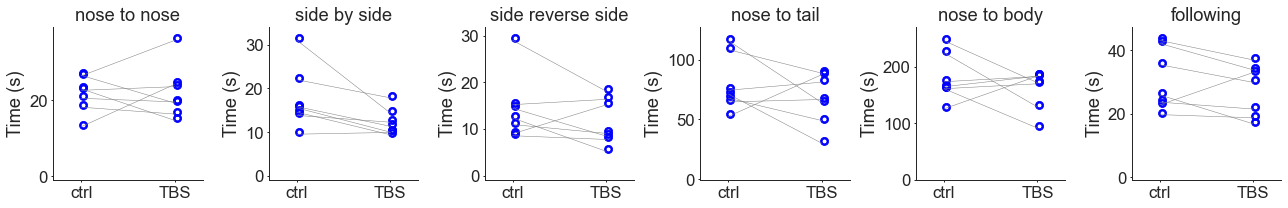

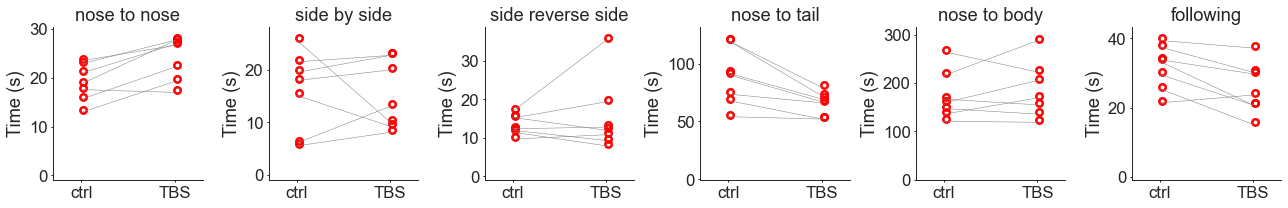

In [2]:
#plot reciprocal social interaction test results
#Figure 8B

RSI_summary = pd.read_csv("./supervised_behavior/RSI_10min_summary.csv", index_col=0)

social_behavior_dict = {"subject_stranger_nose2nose": "nose to nose",
                         "subject_stranger_sidebyside": "side by side",
                         "subject_stranger_sidereside": "side reverse side",
                         "subject_stranger_nose2tail": "nose to tail",
                         "subject_stranger_nose2body": "nose to body",
                         "subject_stranger_following": "following"}

def plot_supervised_social_behavior (dict_file, genotype, circle_color):

    behavior_class = list(dict_file.keys())

    fig = plt.figure (figsize = (18,3))
    cols = 6
    rows = len(behavior_class)//6 + len(behavior_class)%6
    gs = plt.GridSpec(rows, cols, figure = fig)

    for key, value in dict_file.items():
        summary_m_class = RSI_summary[(RSI_summary["Supervised behavior"]==key)&(RSI_summary["genotype"]==genotype)]

        group_1_df = summary_m_class[summary_m_class["BLA_st_condition"]=="ctrl"][["sample", "Time (s)"]]
        group_2_df = summary_m_class[summary_m_class["BLA_st_condition"]=="TBS"][["sample", "Time (s)"]]

        group_1_list = []
        group_2_list = []

        for a in group_1_df["sample"].tolist():
            for b in group_2_df["sample"].tolist():

                if (a[:-10])==(b[:-10]):
                    group_1_list.append(group_1_df[group_1_df["sample"]==a]["Time (s)"].values[0])
                    group_2_list.append (group_2_df[group_2_df["sample"]==b]["Time (s)"].values[0])
        i = behavior_class.index(key)%6
        j = behavior_class.index(key)//6  
        plt.subplot (gs[j,i])   
        for i in range (len(group_1_list)):    
            plt.scatter (np.zeros (len(group_1_list))[i], group_1_list[i], c = circle_color, marker = "$\circ$", s = 150)
            plt.scatter (np.ones (len(group_1_list))[i], group_2_list[i], c = circle_color, marker= "$\circ$", s = 150)

            plt.plot ([0, 1], [group_1_list[i], group_2_list[i]], c = "gray", linewidth = 0.5)
        plt.xticks([0, 1], ['ctrl', 'TBS'])
        plt.ylabel("Time (s)")
        plt.xlim([-0.3, 1.3])
        plt.ylim([-1, 1.1*(max(np.unique(group_1_list+group_2_list)))])
        plt.title (value)
    plt.margins(x = 0.1)
    plt.tight_layout(pad=1.1)
    sns.despine()
    plt.show()
    
plot_supervised_social_behavior(social_behavior_dict, "WT", "blue")
plot_supervised_social_behavior(social_behavior_dict, "Tbr1", "red")

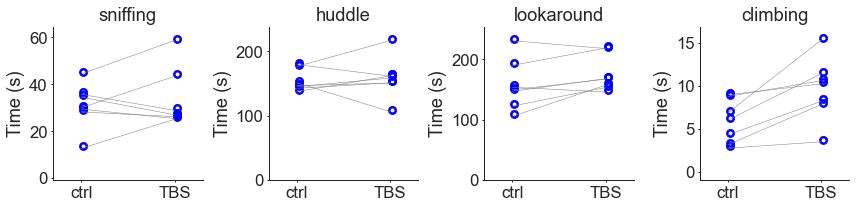

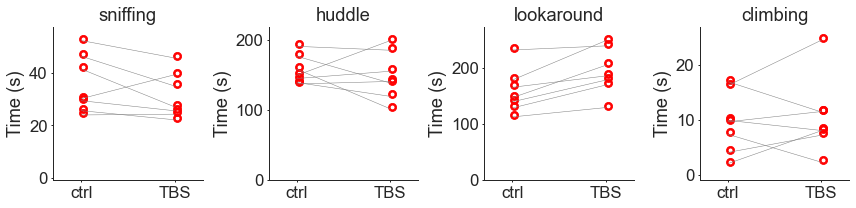

In [3]:
#plot RSI test results
#Figure 8C

RSI_summary = pd.read_csv("./supervised_behavior/RSI_10min_summary.csv", index_col=0)

non_social_behavior_dict = {"subject_sniffing": "sniffing",
                            "subject_huddle": "huddle",
                            "subject_lookaround": "lookaround",
                            "subject_climbing": "climbing"}

def plot_supervised_non_social_behavior (dict_file, genotype, circle_color):

    behavior_class = list(dict_file.keys())

    fig = plt.figure (figsize = (12,3))
    cols = 4
    rows = len(behavior_class)//4 + len(behavior_class)%4
    gs = plt.GridSpec(rows, cols, figure = fig)

    for key, value in dict_file.items():
        summary_m_class = RSI_summary[(RSI_summary["Supervised behavior"]==key)&(RSI_summary["genotype"]==genotype)]

        group_1_df = summary_m_class[summary_m_class["BLA_st_condition"]=="ctrl"][["sample", "Time (s)"]]
        group_2_df = summary_m_class[summary_m_class["BLA_st_condition"]=="TBS"][["sample", "Time (s)"]]

        group_1_list = []
        group_2_list = []

        for a in group_1_df["sample"].tolist():
            for b in group_2_df["sample"].tolist():

                if (a[:-10])==(b[:-10]):
                    group_1_list.append(group_1_df[group_1_df["sample"]==a]["Time (s)"].values[0])
                    group_2_list.append (group_2_df[group_2_df["sample"]==b]["Time (s)"].values[0])
        i = behavior_class.index(key)%4
        j = behavior_class.index(key)//4  
        plt.subplot (gs[j,i])   
        for i in range (len(group_1_list)):    
            plt.scatter (np.zeros (len(group_1_list))[i], group_1_list[i], c = circle_color, marker = "$\circ$", s = 150)
            plt.scatter (np.ones (len(group_1_list))[i], group_2_list[i], c = circle_color, marker= "$\circ$", s = 150)

            plt.plot ([0, 1], [group_1_list[i], group_2_list[i]], c = "gray", linewidth = 0.5)
        plt.xticks([0, 1], ['ctrl', 'TBS'])
        plt.ylabel("Time (s)")
        plt.xlim([-0.3, 1.3])
        plt.ylim([-1, 1.1*(max(np.unique(group_1_list+group_2_list)))])
        plt.title (value)
    plt.margins(x = 0.1)
    plt.tight_layout(pad=1.1)
    sns.despine()
    plt.show()


plot_supervised_non_social_behavior(non_social_behavior_dict, "WT", "blue")
plot_supervised_non_social_behavior(non_social_behavior_dict, "Tbr1", "red")

In [4]:
#stastical analysis of RSI results
#Figure 8B, 8C analysis
RSI_summary = pd.read_csv("./supervised_behavior/RSI_10min_summary.csv", index_col=0)

def wilcoxon_compare (df, dict_file, genotype, group_1, group_2):
    
    summary = pd.DataFrame()
    for key, value in dict_file.items():
        summary_m_class = df[(df["Supervised behavior"]==key)&
                             (df["genotype"]==genotype)&
                             (df["BLA_st_condition"].isin([group_1, group_2]))]

        group_1_df = summary_m_class[summary_m_class["BLA_st_condition"]==group_1][["sample", "Time (s)"]]
        group_2_df = summary_m_class[summary_m_class["BLA_st_condition"]==group_2][["sample", "Time (s)"]]
    
        group_1_list = []
        group_2_list = []
        
        for a in group_1_df["sample"].tolist():
            for b in group_2_df["sample"].tolist():
                if (a[:-10])==(b[:-10]):
                    group_1_list.append(group_1_df[group_1_df["sample"]==a]["Time (s)"].values[0])
                    group_2_list.append (group_2_df[group_2_df["sample"]==b]["Time (s)"].values[0])
                    
        #Two-tailed Wilcoxon signed-rank tests    
        res = pg.wilcoxon(group_1_list, group_2_list, alternative='two-sided', correction=True)
        
        res["Supervised behavior"]=value
        res[group_2+"–"+group_1+" tendency"]=np.mean(np.array(group_2_list)- np.array(group_1_list))
        res["genotype"]=genotype
        summary = pd.concat([summary, res])
        
    print(summary)
    
wilcoxon_compare (RSI_summary, social_behavior_dict, "WT", "ctrl", "TBS")  
wilcoxon_compare (RSI_summary, social_behavior_dict, "Tbr1", "ctrl", "TBS")
wilcoxon_compare (RSI_summary, non_social_behavior_dict, "WT", "ctrl", "TBS")  
wilcoxon_compare (RSI_summary, non_social_behavior_dict, "Tbr1", "ctrl", "TBS")

          W-val alternative     p-val       RBC      CLES Supervised behavior  \
Wilcoxon   13.0   two-sided  0.937500 -0.071429  0.530612        nose to nose   
Wilcoxon    1.0   two-sided  0.031250  0.928571  0.775510        side by side   
Wilcoxon    7.0   two-sided  0.296875  0.500000  0.612245   side reverse side   
Wilcoxon    8.0   two-sided  0.375000  0.428571  0.632653        nose to tail   
Wilcoxon   10.0   two-sided  0.578125  0.285714  0.510204        nose to body   
Wilcoxon    7.0   two-sided  0.296875  0.500000  0.632653           following   

          TBS–ctrl tendency genotype  
Wilcoxon           0.447619       WT  
Wilcoxon          -5.300000       WT  
Wilcoxon          -2.766667       WT  
Wilcoxon         -12.519048       WT  
Wilcoxon         -20.709524       WT  
Wilcoxon          -3.157143       WT  
          W-val alternative     p-val       RBC      CLES Supervised behavior  \
Wilcoxon    1.0   two-sided  0.031250 -0.928571  0.204082        nose to nose 

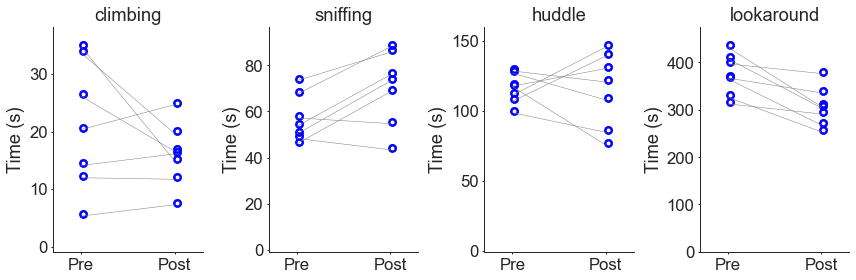

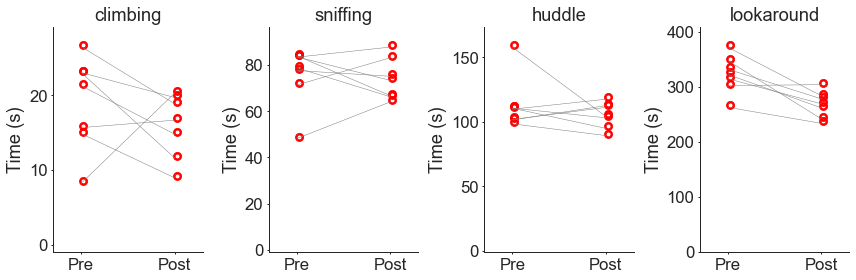

In [5]:
#plot homecage behavior results before reciprocal social interaction test
#Figure S9 D1: no light(ctrl)

homecage_summary = pd.read_csv("./supervised_behavior/homecage_10min_summary.csv", index_col=0)

behavior_class = ["climbing", "sniffing", "huddle", "lookaround"]

def individual_plot_pair_difference (df, genotype, st_condition, circle_color):
    fig = plt.figure (figsize = (12,4))
    cols = 4
    rows = len(behavior_class)//4 + len(behavior_class)%4
    gs = plt.GridSpec(rows, cols, figure = fig)

    for c in behavior_class:
        
        summary_m_class = df[(df["Supervised behavior"]==c)&
                                       (df["genotype"]==genotype)&
                                       (df["BLA_st_condition"]==st_condition)&
                                       (df["period"].isin(["preTBS", "postTBS"]))]

        summary_m_class.loc[:,"sample_re"]= [a.replace("_preTBS_gray", "_d1_preTBS") for a in summary_m_class["sample"].tolist()]
        summary_m_class.loc[:,"sample_rre"]= [a.replace("d2_d1_preTBS", "_d2_preTBS") for a in summary_m_class["sample_re"].tolist()]
        summary_m_class.loc[:, "sample_rrre"]= [a.replace("d3_d1_preTBS", "_d3_preTBS") for a in summary_m_class["sample_rre"].tolist()]
        summary_m_class.loc[:, "resample"]= [a.replace("d10_d1_preTBS", "_d10_preTBS") for a in summary_m_class["sample_rrre"].tolist()]
        summary_m_class.loc[:,"resample_re"]= [a.replace("_postTBS_gray", "_d1_postTBS") for a in summary_m_class["resample"].tolist()]
        summary_m_class.loc[:,"resample_rre"]= [a.replace("d2_d1_postTBS", "_d2_postTBS") for a in summary_m_class["resample_re"].tolist()]
        summary_m_class.loc[:, "resample_rrre"]= [a.replace("d3_d1_postTBS", "_d3_postTBS") for a in summary_m_class["resample_rre"].tolist()]
        summary_m_class.loc[:, "rresample"]= [a.replace("d10_d1_postTBS", "_d10_postTBS") for a in summary_m_class["resample_rrre"].tolist()]
        group_1_df = summary_m_class[summary_m_class["period"]=="preTBS"][["rresample", "Time (s)"]]
        group_2_df = summary_m_class[summary_m_class["period"]=="postTBS"][["rresample", "Time (s)"]]
    
        group_1_list = []
        group_2_list = []
        
        for a in group_1_df["rresample"].tolist():
            for b in group_2_df["rresample"].tolist():
                if (a[:-10])==(b[:-11]):

                    group_1_list.append(group_1_df[group_1_df["rresample"]==a]["Time (s)"].values[0])
                    group_2_list.append (group_2_df[group_2_df["rresample"]==b]["Time (s)"].values[0])
        i = behavior_class.index(c)%4
        j = behavior_class.index(c)//4  
        plt.subplot (gs[j,i])   
        for i in range (len(group_1_list)):    
            plt.scatter (np.zeros (len(group_1_list))[i], group_1_list[i], c = circle_color, marker = "$\circ$", s = 150)
            plt.scatter (np.ones (len(group_1_list))[i], group_2_list[i], c = circle_color, marker= "$\circ$", s = 150)
            
            plt.plot ([0, 1], [group_1_list[i], group_2_list[i]], c = "gray", linewidth = 0.5)
        plt.xticks([0, 1], ["Pre", "Post"])
        plt.ylabel("Time (s)")
        plt.xlim([-0.3, 1.3])
        plt.ylim([-1, 1.1*(max(np.unique(group_1_list+group_2_list)))])
        plt.title (c)
    plt.margins(x = 0.1)
    plt.tight_layout(pad=1.1)
    sns.despine()

individual_plot_pair_difference (homecage_summary, "WT", "ctrl", "blue")
individual_plot_pair_difference (homecage_summary, "Tbr1", "ctrl", "red")

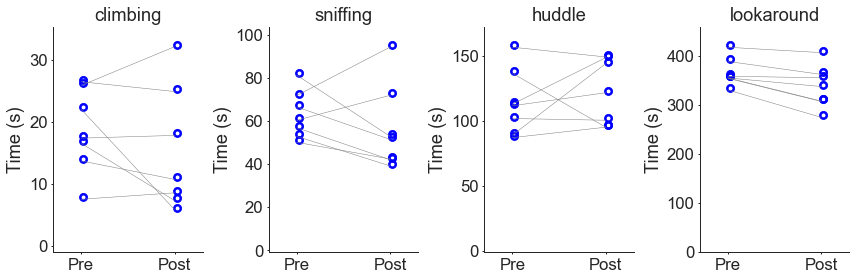

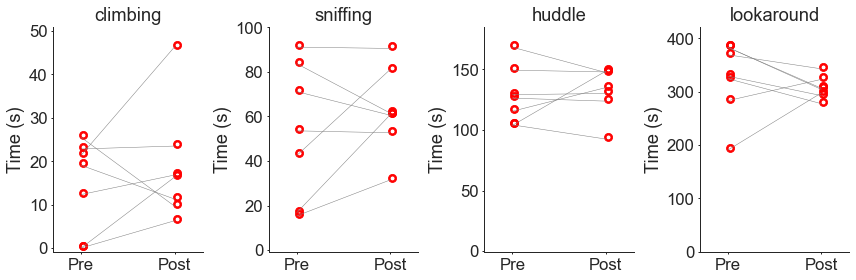

In [6]:
#plot homecage behavior results before reciprocal social interaction test
#Figure S9 D2:blue light(TBS)
homecage_summary = pd.read_csv("./supervised_behavior/homecage_10min_summary.csv", index_col=0)

individual_plot_pair_difference (homecage_summary, "WT", "TBS", "blue")
individual_plot_pair_difference (homecage_summary, "Tbr1", "TBS", "red")

In [7]:
#Comparisons of non-social behaviors during the pre- and post-treatment sessions
#analysis Figure S9 results
homecage_summary = pd.read_csv("./supervised_behavior/homecage_10min_summary.csv", index_col=0)

behavior_class = ["climbing", "sniffing", "huddle", "lookaround"]

def wilcoxon_compare_S9 (df, genotype, st_condition, day_condition):
    
    summary = pd.DataFrame()
    for c in behavior_class:
        summary_m_class = df[(df["Supervised behavior"]==c)&
                                       (df["genotype"]==genotype)&
                                       (df["BLA_st_condition"]==st_condition)&
                                       (df["period"].isin(["preTBS", "postTBS"]))]

        summary_m_class.loc[:,"sample_re"]= [a.replace("_preTBS_gray", "_d1_preTBS") for a in summary_m_class["sample"].tolist()]
        summary_m_class.loc[:,"sample_rre"]= [a.replace("d2_d1_preTBS", "_d2_preTBS") for a in summary_m_class["sample_re"].tolist()]
        summary_m_class.loc[:, "sample_rrre"]= [a.replace("d3_d1_preTBS", "_d3_preTBS") for a in summary_m_class["sample_rre"].tolist()]
        summary_m_class.loc[:, "resample"]= [a.replace("d10_d1_preTBS", "_d10_preTBS") for a in summary_m_class["sample_rrre"].tolist()]
        summary_m_class.loc[:,"resample_re"]= [a.replace("_postTBS_gray", "_d1_postTBS") for a in summary_m_class["resample"].tolist()]
        summary_m_class.loc[:,"resample_rre"]= [a.replace("d2_d1_postTBS", "_d2_postTBS") for a in summary_m_class["resample_re"].tolist()]
        summary_m_class.loc[:, "resample_rrre"]= [a.replace("d3_d1_postTBS", "_d3_postTBS") for a in summary_m_class["resample_rre"].tolist()]
        summary_m_class.loc[:, "rresample"]= [a.replace("d10_d1_postTBS", "_d10_postTBS") for a in summary_m_class["resample_rrre"].tolist()]
        group_1_df = summary_m_class[summary_m_class["period"]=="preTBS"][["rresample", "Time (s)"]]
        group_2_df = summary_m_class[summary_m_class["period"]=="postTBS"][["rresample", "Time (s)"]]
    
        group_1_list = []
        group_2_list = []
        
        for a in group_1_df["rresample"].tolist():
            for b in group_2_df["rresample"].tolist():
                if (a[:-10])==(b[:-11]):

                    group_1_list.append(group_1_df[group_1_df["rresample"]==a]["Time (s)"].values[0])
                    group_2_list.append (group_2_df[group_2_df["rresample"]==b]["Time (s)"].values[0])
                    
        #Two-tailed Wilcoxon signed-rank tests
        res = pg.wilcoxon(group_1_list, group_2_list, alternative='two-sided', correction=True)
        
        res["Supervised behavior"]=c
        res["Post–Pre tendency"]= np.mean(np.array(group_2_list)- np.array(group_1_list))
        res["condition"]= day_condition
        res["genotype"]=genotype
        summary = pd.concat([summary, res])
        
    print(summary)

wilcoxon_compare_S9 (homecage_summary, "WT", "ctrl", "D1:no light(ctrl)")
wilcoxon_compare_S9 (homecage_summary, "Tbr1", "ctrl", "D2:no light(ctrl)")        
wilcoxon_compare_S9 (homecage_summary, "WT", "TBS", "D2:blue light(TBS)")
wilcoxon_compare_S9 (homecage_summary, "Tbr1", "TBS", "D2:blue light(TBS)")

          W-val alternative     p-val       RBC      CLES Supervised behavior  \
Wilcoxon    9.0   two-sided  0.468750  0.357143  0.632653            climbing   
Wilcoxon    3.0   two-sided  0.078125 -0.785714  0.244898            sniffing   
Wilcoxon   13.0   two-sided  0.937500  0.071429  0.428571              huddle   
Wilcoxon    0.0   two-sided  0.015625  1.000000  0.877551          lookaround   

          Post–Pre tendency          condition genotype  
Wilcoxon          -5.047619  D1:no light(ctrl)       WT  
Wilcoxon          13.276190  D1:no light(ctrl)       WT  
Wilcoxon          -0.519048  D1:no light(ctrl)       WT  
Wilcoxon         -67.509524  D1:no light(ctrl)       WT  
          W-val alternative    p-val       RBC      CLES Supervised behavior  \
Wilcoxon    8.0   two-sided  0.37500  0.428571  0.693878            climbing   
Wilcoxon   12.0   two-sided  0.81250  0.142857  0.632653            sniffing   
Wilcoxon   11.0   two-sided  0.68750  0.214286  0.510204        

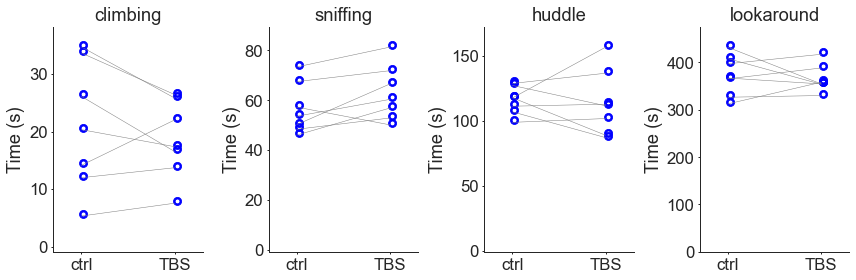

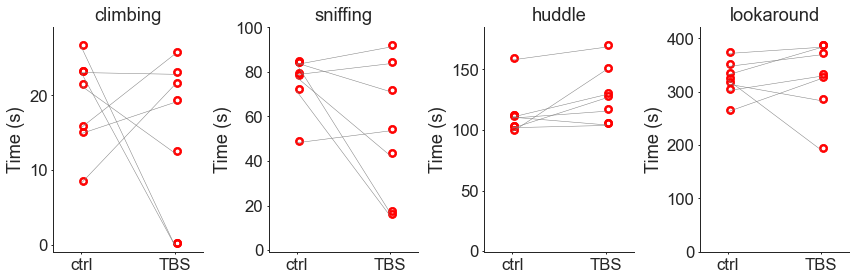

In [8]:
#plot homecage behavior results before reciprocal social interaction test
#Figure S10 Pre treatment
homecage_summary = pd.read_csv("./supervised_behavior/homecage_10min_summary.csv", index_col=0)

behavior_class = ["climbing", "sniffing", "huddle", "lookaround"]

def individual_plot_pair_difference_d (df, genotype, period, circle_color):
    
    fig = plt.figure (figsize = (12,4))
    cols = 4
    rows = len(behavior_class)//4 + len(behavior_class)%4
    gs = plt.GridSpec(rows, cols, figure = fig)

    for c in behavior_class:
        summary_m_class = df[(df["Supervised behavior"]==c)&
                                       (df["genotype"]==genotype)&
                                       (df["BLA_st_condition"].isin(["ctrl", "TBS"]))&
                                       (df["period"]==period)]

        summary_m_class.loc[:,"sample_re"]= [a.replace("_preTBS_gray", "_d1_preTBS") for a in summary_m_class["sample"].tolist()]
        summary_m_class.loc[:,"sample_rre"]= [a.replace("d2_d1_preTBS", "_d2_preTBS") for a in summary_m_class["sample_re"].tolist()]
        summary_m_class.loc[:, "sample_rrre"]= [a.replace("d3_d1_preTBS", "_d3_preTBS") for a in summary_m_class["sample_rre"].tolist()]
        summary_m_class.loc[:, "resample"]= [a.replace("d10_d1_preTBS", "_d10_preTBS") for a in summary_m_class["sample_rrre"].tolist()]
        summary_m_class.loc[:,"resample_re"]= [a.replace("_postTBS_gray", "_d1_postTBS") for a in summary_m_class["resample"].tolist()]
        summary_m_class.loc[:,"resample_rre"]= [a.replace("d2_d1_postTBS", "_d2_postTBS") for a in summary_m_class["resample_re"].tolist()]
        summary_m_class.loc[:, "resample_rrre"]= [a.replace("d3_d1_postTBS", "_d3_postTBS") for a in summary_m_class["resample_rre"].tolist()]
        summary_m_class.loc[:, "rresample"]= [a.replace("d10_d1_postTBS", "_d10_postTBS") for a in summary_m_class["resample_rrre"].tolist()]
        group_1_df = summary_m_class[summary_m_class["BLA_st_condition"]=="ctrl"][["rresample", "Time (s)"]]
        group_2_df = summary_m_class[summary_m_class["BLA_st_condition"]=="TBS"][["rresample", "Time (s)"]]
    
        group_1_list = []
        group_2_list = []
        
        for a in group_1_df["rresample"].tolist():
            for b in group_2_df["rresample"].tolist():
                if (a[:-10])==(b[:-10]):                    
                    group_1_list.append(group_1_df[group_1_df["rresample"]==a]["Time (s)"].values[0])
                    group_2_list.append (group_2_df[group_2_df["rresample"]==b]["Time (s)"].values[0])
        i = behavior_class.index(c)%4
        j = behavior_class.index(c)//4  
        plt.subplot (gs[j,i])   
        for i in range (len(group_1_list)):    
            plt.scatter (np.zeros (len(group_1_list))[i], group_1_list[i], c = circle_color, marker = "$\circ$", s = 150)
            plt.scatter (np.ones (len(group_1_list))[i], group_2_list[i], c = circle_color, marker= "$\circ$", s = 150)
            
            plt.plot ([0, 1], [group_1_list[i], group_2_list[i]], c = "gray", linewidth = 0.5)
        plt.xticks([0, 1], ['ctrl', 'TBS'])
        plt.ylabel("Time (s)")
        plt.xlim([-0.3, 1.3])
        plt.ylim([-1, 1.1*(max(np.unique(group_1_list+group_2_list)))])
        plt.title (c)
    plt.margins(x = 0.1)
    plt.tight_layout(pad=1.1)
    sns.despine()

individual_plot_pair_difference_d (homecage_summary, "WT", "preTBS", "blue")
individual_plot_pair_difference_d (homecage_summary, "Tbr1", "preTBS", "red")

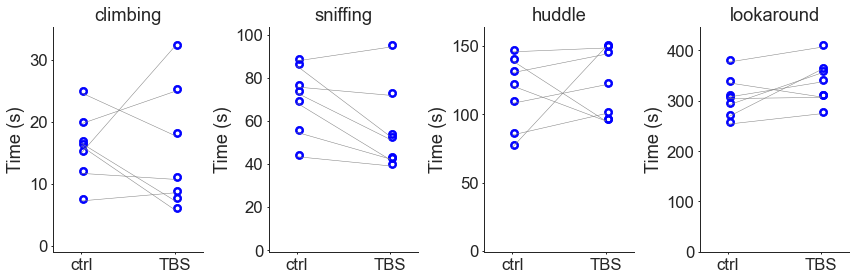

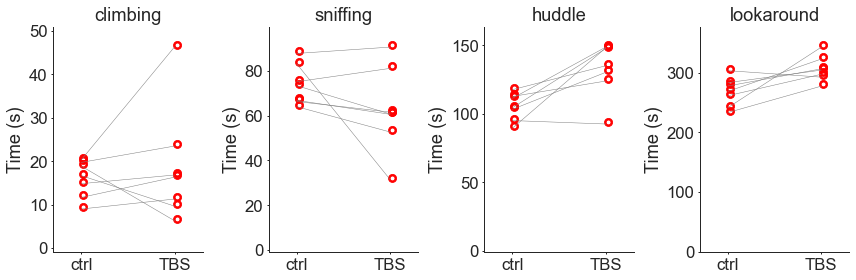

In [9]:
#plot homecage behavior results before reciprocal social interaction test
#Figure S10Post treatment
homecage_summary = pd.read_csv("./supervised_behavior/homecage_10min_summary.csv", index_col=0)

individual_plot_pair_difference_d (homecage_summary, "WT", "postTBS", "blue")
individual_plot_pair_difference_d (homecage_summary, "Tbr1", "postTBS", "red")

In [10]:
#The effect of TBS at BLA on non-social behaviors prior to a reciprocal social interaction test.
#analysis Figure S10 results
homecage_summary = pd.read_csv("./supervised_behavior/homecage_10min_summary.csv", index_col=0)

behavior_class = ["climbing", "sniffing", "huddle", "lookaround"]

def wilcoxon_compare_S10 (df, genotype, period, period_condition):
    
    summary = pd.DataFrame()
    for c in behavior_class:
        summary_m_class = df[(df["Supervised behavior"]==c)&
                                       (df["genotype"]==genotype)&
                                       (df["BLA_st_condition"].isin(["ctrl", "TBS"]))&
                                       (df["period"]==period)]

        summary_m_class.loc[:,"sample_re"]= [a.replace("_preTBS_gray", "_d1_preTBS") for a in summary_m_class["sample"].tolist()]
        summary_m_class.loc[:,"sample_rre"]= [a.replace("d2_d1_preTBS", "_d2_preTBS") for a in summary_m_class["sample_re"].tolist()]
        summary_m_class.loc[:, "sample_rrre"]= [a.replace("d3_d1_preTBS", "_d3_preTBS") for a in summary_m_class["sample_rre"].tolist()]
        summary_m_class.loc[:, "resample"]= [a.replace("d10_d1_preTBS", "_d10_preTBS") for a in summary_m_class["sample_rrre"].tolist()]
        summary_m_class.loc[:,"resample_re"]= [a.replace("_postTBS_gray", "_d1_postTBS") for a in summary_m_class["resample"].tolist()]
        summary_m_class.loc[:,"resample_rre"]= [a.replace("d2_d1_postTBS", "_d2_postTBS") for a in summary_m_class["resample_re"].tolist()]
        summary_m_class.loc[:, "resample_rrre"]= [a.replace("d3_d1_postTBS", "_d3_postTBS") for a in summary_m_class["resample_rre"].tolist()]
        summary_m_class.loc[:, "rresample"]= [a.replace("d10_d1_postTBS", "_d10_postTBS") for a in summary_m_class["resample_rrre"].tolist()]
        group_1_df = summary_m_class[summary_m_class["BLA_st_condition"]=="ctrl"][["rresample", "Time (s)"]]
        group_2_df = summary_m_class[summary_m_class["BLA_st_condition"]=="TBS"][["rresample", "Time (s)"]]
    
        group_1_list = []
        group_2_list = []
        
        for a in group_1_df["rresample"].tolist():
            for b in group_2_df["rresample"].tolist():
                if (a[:-11])==(b[:-11]):
                    
                    group_1_list.append(group_1_df[group_1_df["rresample"]==a]["Time (s)"].values[0])
                    group_2_list.append (group_2_df[group_2_df["rresample"]==b]["Time (s)"].values[0])
                    
        #Two-tailed Wilcoxon signed-rank tests 
        res = pg.wilcoxon(group_1_list, group_2_list, alternative='two-sided', correction=True)
        
        res["Supervised behavior"]=c
        res["TBS–ctrl tendency"]= np.mean(np.array(group_2_list)- np.array(group_1_list))
        res["condition"]= period_condition
        res["genotype"]=genotype
        summary = pd.concat([summary, res])
    print(summary)

wilcoxon_compare_S10 (homecage_summary, "WT", "preTBS", "Pre treatment")
wilcoxon_compare_S10 (homecage_summary, "Tbr1", "preTBS", "Pre treatment")
wilcoxon_compare_S10 (homecage_summary, "WT", "postTBS", "Post treatment")
wilcoxon_compare_S10 (homecage_summary, "Tbr1", "postTBS", "Post treatment")

          W-val alternative     p-val       RBC      CLES Supervised behavior  \
Wilcoxon   74.0   two-sided  0.418041  0.221053  0.551247            climbing   
Wilcoxon   45.0   two-sided  0.044559 -0.526316  0.357341            sniffing   
Wilcoxon   95.0   two-sided  1.000000  0.000000  0.509695              huddle   
Wilcoxon   81.0   two-sided  0.594887  0.147368  0.567867          lookaround   

          TBS–ctrl tendency      condition genotype  
Wilcoxon          -2.345614  Pre treatment       WT  
Wilcoxon           6.192982  Pre treatment       WT  
Wilcoxon           0.991228  Pre treatment       WT  
Wilcoxon          -6.870175  Pre treatment       WT  
          W-val alternative     p-val       RBC      CLES Supervised behavior  \
Wilcoxon   45.0   two-sided  0.044559  0.526316  0.689751            climbing   
Wilcoxon   29.0   two-sided  0.006180  0.694737  0.764543            sniffing   
Wilcoxon   47.0   two-sided  0.054573 -0.505263  0.282548              huddle   
